In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

## Exploratory Data Analysis

#### Viewing part of the training dataset

In [3]:
train_data_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/train.parquet"
train_data_0_path=f"{train_data_path}/partition_id=0/part-0.parquet"
part_0_data=pd.read_parquet(train_data_0_path)
part_0_data

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.889038,NaN,NaN,NaN,NaN,NaN,0.851033,...,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
1,0,0,7,1.370613,NaN,NaN,NaN,NaN,NaN,0.676961,...,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.000000,0.703665,0.216683,0.778639
2,0,0,9,2.285698,NaN,NaN,NaN,NaN,NaN,1.056285,...,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
3,0,0,10,0.690606,NaN,NaN,NaN,NaN,NaN,1.139366,...,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
4,0,0,14,0.440570,NaN,NaN,NaN,NaN,NaN,0.955200,...,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.000000,-3.572820,-1.089123,-5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944205,169,848,19,3.438631,NaN,NaN,NaN,NaN,NaN,-0.028087,...,-0.166964,0.983339,-0.669860,0.272615,-3.676842,-1.221126,1.070584,0.465345,0.207483,0.874975
1944206,169,848,30,0.768528,NaN,NaN,NaN,NaN,NaN,-0.022584,...,-0.352810,0.992615,0.961595,1.089402,0.796034,0.488380,1.846634,-0.088542,-0.008324,-0.153451
1944207,169,848,33,1.354696,NaN,NaN,NaN,NaN,NaN,-0.024804,...,-0.239716,1.701618,0.757672,-5.000000,-3.174266,-1.110790,-3.349107,-0.407801,-0.185842,-0.931004
1944208,169,848,34,1.021797,NaN,NaN,NaN,NaN,NaN,-0.016138,...,-0.442859,-2.036891,-0.064228,1.919665,1.827681,0.872019,3.248694,0.254584,0.090288,0.434726


In [4]:
part_0_data.columns

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_6

In [7]:
part_0_data.describe()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,0.0,0.0,0.0,0.0,0.0,1.944210e+06,...,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06,1.944210e+06
mean,9.384629e+01,4.240000e+02,1.376638e+01,1.973281e+00,NaN,NaN,NaN,NaN,NaN,-4.463175e-02,...,-9.805073e-02,8.424639e-03,1.076465e-02,2.412764e-03,1.139089e-02,2.185480e-02,3.326982e-03,1.487634e-03,-4.817980e-04,1.078154e-03
std,4.813196e+01,2.450851e+02,1.108778e+01,9.691969e-01,NaN,NaN,NaN,NaN,NaN,9.479579e-01,...,6.398993e-01,9.558780e-01,1.141793e+00,8.442027e-01,1.276044e+00,1.266448e+00,1.225165e+00,8.705768e-01,8.918150e-01,8.737320e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,4.405696e-01,NaN,NaN,NaN,NaN,NaN,-1.176608e+01,...,-3.393299e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00,-5.000000e+00
25%,5.400000e+01,2.120000e+02,7.000000e+00,1.323803e+00,NaN,NaN,NaN,NaN,NaN,-4.756072e-01,...,-3.195696e-01,-2.322211e-01,-2.667868e-01,-1.210319e-01,-4.444537e-01,-5.146699e-01,-2.569897e-01,-3.558709e-01,-3.914038e-01,-2.892584e-01
50%,9.900000e+01,4.240000e+02,1.200000e+01,1.763827e+00,NaN,NaN,NaN,NaN,NaN,-5.818180e-02,...,-2.468792e-01,-3.943805e-03,-2.333469e-02,-1.248489e-03,-1.031224e-02,-1.836913e-02,-4.690550e-03,-9.597129e-03,-2.376243e-02,-3.107830e-04
75%,1.360000e+02,6.360000e+02,1.700000e+01,2.393846e+00,NaN,NaN,NaN,NaN,NaN,3.493771e-01,...,-1.256560e-01,2.309678e-01,2.538152e-01,1.191232e-01,4.292141e-01,5.065366e-01,2.438874e-01,3.360999e-01,3.463979e-01,2.840819e-01
max,1.690000e+02,8.480000e+02,3.800000e+01,6.011999e+00,NaN,NaN,NaN,NaN,NaN,1.532000e+01,...,4.370195e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


### Taking a closer look to the csv files

#### features.csv

In [10]:
original_feature_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/features.csv"
features=pd.read_csv(original_feature_path)
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,feature_02,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,feature_03,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,feature_04,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,feature_74,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
75,feature_75,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
76,feature_76,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
77,feature_77,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [15]:
features[[ f"tag_{no}" for no in range(0,17,1)]].T

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
tag_0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tag_1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
tag_2,True,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tag_3,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
tag_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tag_5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tag_6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tag_7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tag_8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
tag_9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False


In [30]:
features[[ f"tag_{no}" for no in range(0,17,1)]].T.corr()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,1.000000,0.834523,0.595238,0.595238,0.470757,0.595238,0.190476,0.190476,0.309890,-0.115728,...,-0.214286,0.190476,-0.214286,-0.214286,0.309890,0.309890,-0.169031,-0.169031,-0.169031,-0.169031
1,0.834523,1.000000,0.470757,0.834523,0.673077,0.470757,0.106990,0.470757,0.227866,-0.138675,...,0.106990,0.106990,-0.256776,0.106990,0.227866,0.227866,-0.202548,-0.202548,0.227866,0.227866
2,0.595238,0.470757,1.000000,0.595238,0.834523,0.190476,0.595238,0.190476,0.309890,-0.115728,...,-0.214286,-0.214286,0.190476,-0.214286,-0.169031,-0.169031,0.309890,0.309890,-0.169031,-0.169031
3,0.595238,0.834523,0.595238,1.000000,0.834523,0.190476,0.190476,0.595238,0.309890,-0.115728,...,0.190476,-0.214286,-0.214286,0.190476,-0.169031,-0.169031,-0.169031,-0.169031,0.309890,0.309890
4,0.470757,0.673077,0.834523,0.834523,1.000000,0.106990,0.470757,0.470757,0.227866,-0.138675,...,0.106990,-0.256776,0.106990,0.106990,-0.202548,-0.202548,0.227866,0.227866,0.227866,0.227866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.309890,0.227866,-0.169031,-0.169031,-0.202548,0.309890,-0.169031,-0.169031,-0.133333,-0.091287,...,-0.169031,0.309890,-0.169031,-0.169031,1.000000,1.000000,0.433333,0.433333,0.433333,0.433333
75,-0.169031,-0.202548,0.309890,-0.169031,0.227866,-0.169031,0.309890,-0.169031,-0.133333,-0.091287,...,-0.169031,-0.169031,0.309890,-0.169031,0.433333,0.433333,1.000000,1.000000,0.433333,0.433333
76,-0.169031,-0.202548,0.309890,-0.169031,0.227866,-0.169031,0.309890,-0.169031,-0.133333,-0.091287,...,-0.169031,-0.169031,0.309890,-0.169031,0.433333,0.433333,1.000000,1.000000,0.433333,0.433333
77,-0.169031,0.227866,-0.169031,0.309890,0.227866,-0.169031,-0.169031,0.309890,-0.133333,-0.091287,...,0.309890,-0.169031,-0.169031,0.309890,0.433333,0.433333,0.433333,0.433333,1.000000,1.000000


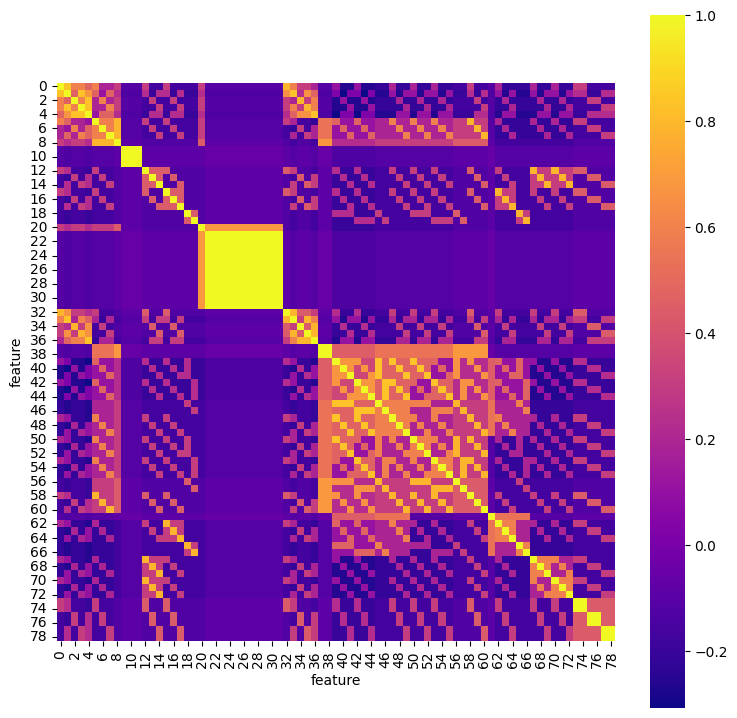

In [37]:
plt.figure(figsize=(9, 9))
sns.heatmap(features[[ f"tag_{num}" for num in range(0,17,1)]].T.corr(), square=True, cmap="plasma")
plt.xlabel("feature")
plt.ylabel("feature")
plt.show()

#### responders.csv

In [22]:
original_responder_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/responders.csv"
responders=pd.read_csv(original_responder_path)
responders

,responder,tag_0,tag_1,tag_2,tag_3,tag_4
0,responder_0,True,False,True,False,False
1,responder_1,True,False,False,True,False
2,responder_2,True,True,False,False,False
3,responder_3,False,False,True,False,True
4,responder_4,False,False,False,True,True
5,responder_5,False,True,False,False,True
6,responder_6,False,False,True,False,False
7,responder_7,False,False,False,True,False
8,responder_8,False,True,False,False,False


In [31]:
responders[[ f"tag_{num}" for num in range(0,5,1)]].T.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.166667,0.166667,0.166667,-0.666667,-0.666667,0.612372,-0.408248,-0.408248
1,0.166667,1.000000,0.166667,-0.666667,0.166667,-0.666667,-0.408248,0.612372,-0.408248
2,0.166667,0.166667,1.000000,-0.666667,-0.666667,0.166667,-0.408248,-0.408248,0.612372
3,0.166667,-0.666667,-0.666667,1.000000,0.166667,0.166667,0.612372,-0.408248,-0.408248
4,-0.666667,0.166667,-0.666667,0.166667,1.000000,0.166667,-0.408248,0.612372,-0.408248
5,-0.666667,-0.666667,0.166667,0.166667,0.166667,1.000000,-0.408248,-0.408248,0.612372
6,0.612372,-0.408248,-0.408248,0.612372,-0.408248,-0.408248,1.000000,-0.250000,-0.250000
7,-0.408248,0.612372,-0.408248,-0.408248,0.612372,-0.408248,-0.250000,1.000000,-0.250000
8,-0.408248,-0.408248,0.612372,-0.408248,-0.408248,0.612372,-0.250000,-0.250000,1.000000


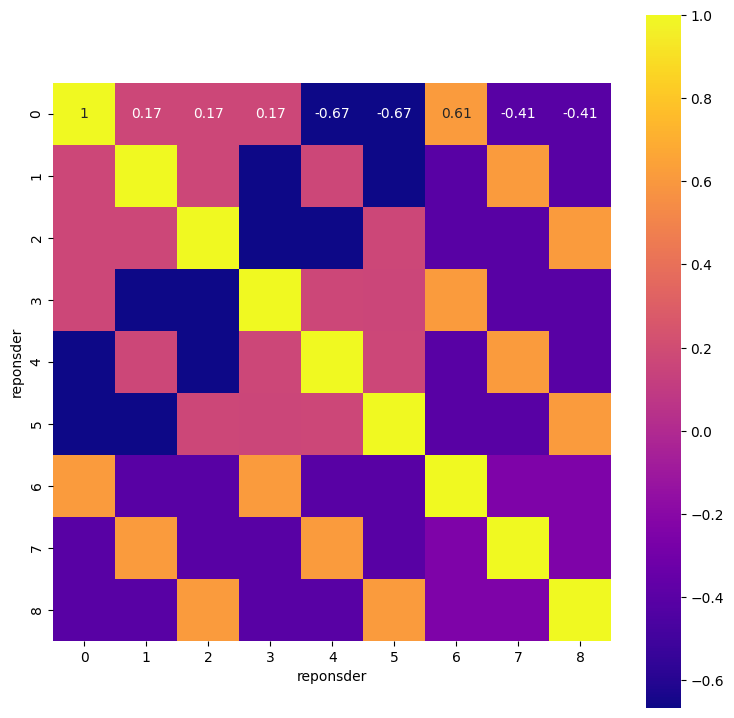

In [36]:
plt.figure(figsize=(9, 9))
sns.heatmap(responders[[ f"tag_{num}" for num in range(0,5,1)]].T.corr(), annot=True,  square=True, cmap="plasma")
plt.xlabel("reponsder")
plt.ylabel("reponsder")
plt.show()

#### sample_submission.csv

In [34]:
sample_submission_path="/Users/mic/Desktop/Github/js_market_forecast/jane-street-real-time-market-data-forecasting/sample_submission.csv"
sample_submission=pd.read_csv(sample_submission_path)
sample_submission

,row_id,responder_6
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0
